# **Previsão de Séries Temporais com Prophet**

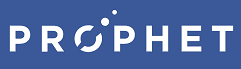

Framework desenvolvido em 2017 pelo FACEBOOK para previsão de Séries Temporais, em que, os autores do modelo de previsão Prophet se basearam na decomposição de uma série temporal y(t) em 4 componentes Tendência, Sazonalidade, Feriados e Erro: $y(t) = g(t) + s(t) + h(t) + \epsilon(t)$

- $g(t)$ é a função de tendência que modela mudanças não periódicas no valor da
série temporal;

- $s(t)$ representa mudanças periódicas (por exemplo, sazonalidade semanal e anual);

- $h(t)$ representa os efeitos dos feriados que ocorrem em horários potencialmente irregulares ao longo de um ou mais dias. 

- $\epsilon(t)$ representa quaisquer mudanças idiossincráticas que não são acomodadas pelo modelo.

O artigo que apresenta toda teoria do modelo de previsão do Prophet pode ser lido no  link https://peerj.com/preprints/3190v2/.


# **Consumo de eletricidade no setor residencial - Empresa de Pesquisa Energética do Brasil (1970 a 2021)**

## **Pré-Processamento**

### **Preparando o ambiente**

In [2]:
# Importando biblioteca necessária
import pandas as pd
import numpy as np
from fbprophet import Prophet

ModuleNotFoundError: No module named 'fbprophet'

### **Carregando o conjunto de dados - Empresa de Pesquisa Energética (EPE)**

https://www.epe.gov.br/pt/publicacoes-dados-abertos/publicacoes/BEN-Series-Historicas-Completas

In [2]:
# Importando o Pandas
import pandas as pd

In [3]:
# Importando o conjunto de dados do consumo de energia elétrica

file = 'https://raw.githubusercontent.com/rogeriodelfim/Dataset/main/EPE/epe_consumo_residencial.csv'
epe = pd.read_csv(
    filepath_or_buffer = file, 
    sep=';',
    decimal=','
)

### **Espiando a estrutura dos dados**

In [4]:
# Espiando o conjunto de dados
epe.head(5)

,ano,gas_natural,lenha,gas_liquefeito_de_petroleo,querosene,gas_canalizado,eletricidade
0,1970,0,19070.388792,1297.406214,447.380478,104.218296,719.390000
1,1971,0,19058.303628,1393.237355,419.521621,105.947604,793.608000
2,1972,0,18998.187684,1526.540929,427.715402,106.397424,854.152000
3,1973,0,18593.489628,1677.659267,466.226176,109.716096,940.721561
4,1974,0,18376.886304,1775.333314,403.953435,116.353440,1033.720000


In [5]:
# Informacoes gerais do conjunto de dados
epe.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ano                         52 non-null     int64  
 1   gas_natural                 52 non-null     int64  
 2   lenha                       52 non-null     float64
 3   gas_liquefeito_de_petroleo  52 non-null     float64
 4   querosene                   52 non-null     float64
 5   gas_canalizado              52 non-null     float64
 6   eletricidade                52 non-null     float64
dtypes: float64(5), int64(2)
memory usage: 3.0 KB


## **Previsão com Prophet**

https://facebook.github.io/prophet/

Esse framework da Facebook para previsão de séries temporais exige que os dados de entrada seja um dataframe com duas colunas:
- **ds**: que significa (datastamp) deve ter um formato de datetime esperado pelo Pandas, preferencialmente no formato AAAA-MM-DD se for somente a data ou AAAA-MM-DD HH:MM:SS se for data e hora. 
-**y**: deve ter os dados observados nas datas e que se pretende prever, e ser numérica.

### **Transformando o conjunto de dados**

In [6]:
st_eletricidade = pd.DataFrame(
    data = {
      'ds': pd.date_range(start="1970-12-31",end="2021-12-31",  freq='A'), 
      'y':epe['eletricidade'].values
    }
)


In [7]:
# Espiando o resultado
st_eletricidade.head()

,ds,y
0,1970-12-31,719.390000
1,1971-12-31,793.608000
2,1972-12-31,854.152000
3,1973-12-31,940.721561
4,1974-12-31,1033.720000


In [8]:
# Espiando a estrutura serie temporal
st_eletricidade.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      52 non-null     datetime64[ns]
 1   y       52 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 960.0 bytes


### **Dividindo a série entre treino e teste**

In [9]:
# Dividindo entre treino e teste
st_eletricidade_treino = st_eletricidade.query('ds<="2018-12-31"')
st_eletricidade_teste = st_eletricidade.query('ds>"2018-12-31"')

# Verificando a divisão
st_eletricidade_treino.shape , st_eletricidade_teste.shape

((49, 2), (3, 2))

### **Fazendo a modelagem com o Prophet**

In [10]:
# Instanciando o modelo
modelo = Prophet()

NameError: name 'Prophet' is not defined

In [11]:
# Ajustando o modelo aos dados
modelo.fit(st_eletricidade_treino)

NameError: name 'modelo' is not defined

### **Fazendo Previsão com o Prophet**

In [12]:
# Criando dataframe com os períodos futuros para as previsões
st_futuro = modelo.make_future_dataframe(
    periods=3, 
    freq = 'A', 
    include_history = True
)

# Espiando o df gerado
st_futuro.tail(5)

NameError: name 'modelo' is not defined

In [13]:
# Realizando as previsões
previsao_Prophet = modelo.predict(st_futuro)

NameError: name 'modelo' is not defined

In [14]:
# Fazendo grafico da previsao
grafico_previsao_Prophet = modelo.plot(previsao_Prophet)
grafico_previsao_Prophet.show()

NameError: name 'modelo' is not defined

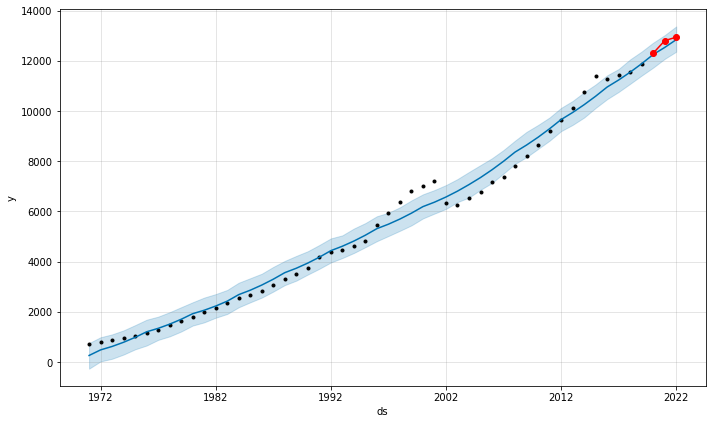

In [15]:
# Carregando biblioteca necessária
import matplotlib.pyplot as plt

# Inserindo os dados de teste no grafico da previsao
grafico_previsao_Prophet = modelo.plot(previsao_Prophet)
plt.plot(st_eletricidade_teste['ds'], st_eletricidade_teste['y'],color='red', label='dados reais de teste', marker = 'o')
grafico_previsao_Prophet.show()

In [16]:
# Entendo a estrutura do df resultante da previsao
previsao_Prophet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   ds                          52 non-null     datetime64[ns]
 1   trend                       52 non-null     float64       
 2   yhat_lower                  52 non-null     float64       
 3   yhat_upper                  52 non-null     float64       
 4   trend_lower                 52 non-null     float64       
 5   trend_upper                 52 non-null     float64       
 6   additive_terms              52 non-null     float64       
 7   additive_terms_lower        52 non-null     float64       
 8   additive_terms_upper        52 non-null     float64       
 9   yearly                      52 non-null     float64       
 10  yearly_lower                52 non-null     float64       
 11  yearly_upper                52 non-null     float64       
 

In [17]:
# Visualizando somente previsoes das ultimas instâncias
previsao_Prophet[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
47,2017-12-31,11545.188163,11082.132106,12055.210161
48,2018-12-31,11883.388180,11410.905736,12369.091610
49,2019-12-31,12249.169222,11727.423352,12720.091499
50,2020-12-31,12530.806294,12075.814208,13020.996074
51,2021-12-31,12841.383170,12362.617717,13368.283328


### **Avaliando a qualidade da previsão**

In [18]:
## Calculando métrica de avaliação do modelo de previsão
## erro médio absoluto (MAE) - meanabs
## raiz do erro quadrático médio (RMSE) - rmse

# Carregando bibliotecas necessárias
from statsmodels.tools.eval_measures import meanabs, rmse

# Calculando as métricas para previsão com modelo gerado pelo autorima
mae_Prophet = meanabs(st_eletricidade_teste.y.values,previsao_Prophet['yhat'].tail(3).values)
rmse_Prophet = rmse(st_eletricidade_teste.y.values,previsao_Prophet['yhat'].tail(3).values)

# Verificando as métricas
print('Prophet: MAE = {}'.format(mae_Prophet))
print('Prophet: RMSE = {}'.format(rmse_Prophet))

Prophet: MAE = 140.85513655271947
Prophet: RMSE = 168.84838130158994



## **Auto ARIMA**

### **Gerando o objeto tipo series com os dados de treino**

In [19]:
# Criando a  Serie temporal de treino
serie_eletricidade_treino = pd.Series(
    data = epe.query('ano<=2018').eletricidade.values, 
    index = pd.date_range(start="1970-12-31",end="2018-12-31",  freq='A')
)

# Espiando o resultado
serie_eletricidade_treino

1970-12-31      719.390000
1971-12-31      793.608000
1972-12-31      854.152000
1973-12-31      940.721561
1974-12-31     1033.720000
1975-12-31     1136.060000
1976-12-31     1279.422000
1977-12-31     1473.438000
1978-12-31     1629.356000
1979-12-31     1807.720000
1980-12-31     2000.618000
1981-12-31     2154.472000
1982-12-31     2328.106000
1983-12-31     2557.296000
1984-12-31     2659.636000
1985-12-31     2806.524000
1986-12-31     3074.930000
1987-12-31     3300.594000
1988-12-31     3485.924000
1989-12-31     3760.608000
1990-12-31     4185.276000
1991-12-31     4389.182000
1992-12-31     4460.390000
1993-12-31     4612.094000
1994-12-31     4811.872000
1995-12-31     5467.966000
1996-12-31     5938.816000
1997-12-31     6370.106000
1998-12-31     6826.508000
1999-12-31     6991.026000
2000-12-31     7190.718000
2001-12-31     6344.220000
2002-12-31     6256.672000
2003-12-31     6548.298000
2004-12-31     6757.622000
2005-12-31     7154.598000
2006-12-31     7379.660000
2

### **Preparando ambiente**

In [15]:
#Instalando biblioteca necessária
#pip install pmdarima

In [16]:
# Importando biblioteca necessária
import statsmodels.tsa
from statsmodels.tsa.arima.model import ARIMA
from pmdarima.arima import auto_arima

### **Ajustando Auto ARIMA**

In [17]:
### AUTOARIMA
modelo_autoarima = auto_arima(
    serie_eletricidade_treino, 
    trace = True, 
    stepwise = False, 
    seasonal=False, 
    with_intercept = False,
    start_p=0, 
    start_d=0, 
    start_q=0, 
    max_p=6,
    max_d=2, 
    max_q=6,
    m=1)

NameError: name 'serie_eletricidade_treino' is not defined

### **Realizando Previsões com o autoARIMA**

In [26]:
# # Ajustando o modelo selecionado aos dados e Predizendo 3 períodos
previsao_autoarima = modelo_autoarima.fit(serie_eletricidade_treino).predict(n_periods=3)
previsao_autoarima

array([12140.29126907, 12402.61035011, 12664.06324643])

### **Avaliando a qualidade da previsão do AutoARIMA**

In [27]:
## Calculando métrica de avaliação do modelo de previsão
## erro médio absoluto (MAE) - meanabs
## raiz do erro quadrático médio (RMSE) - rmse

# Calculando as métricas para previsão com modelo gerado pelo autorima
mae_autoarima = meanabs(st_eletricidade_teste.y.values,previsao_autoarima)
rmse_autoarima = rmse(st_eletricidade_teste.y.values,previsao_autoarima)

# Verificando as métricas
print('AUTOARIMA: MAE = {}'.format(mae_autoarima))
print('AUTOARIMA: RMSE = {}'.format(rmse_autoarima))

AUTOARIMA: MAE = 278.9864099819703
AUTOARIMA: RMSE = 295.1249619525393


## **Comparando as predições do Prophet com o AutoARIMA**

In [35]:
# Criando a  Serie temporal de previsao do AUTOARIMA
st_eletricidade_prev_AUTOARIMA = pd.Series(
    data = previsao_autoarima, 
    index = pd.date_range(start="2019-12-31",end="2021-12-31",  freq='A')
)

# Criando a  Serie temporal de previsao do Prophet
st_eletricidade_prev_Prophet = pd.Series(
    data = previsao_Prophet.query('ds>"2018-12-31"').yhat.values, 
    index = pd.date_range(start="2019-12-31",end="2021-12-31",  freq='A')
)

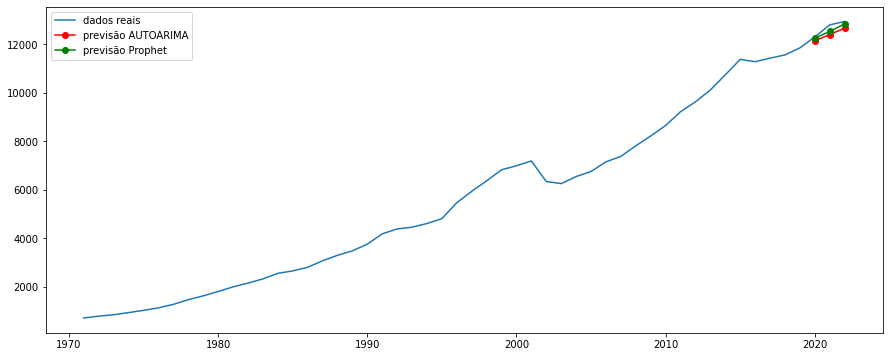

In [36]:
# Plotando a série com dados reais e ajustados pelo modelo
fig, ax = plt.subplots(figsize = (15,6))
plt.plot(st_eletricidade['ds'], st_eletricidade['y'], label='dados reais')
plt.plot(st_eletricidade_prev_AUTOARIMA,color='red', label='previsão AUTOARIMA', marker = 'o')
plt.plot(st_eletricidade_prev_Prophet ,color='green', label='previsão Prophet', marker = 'o')
plt.legend(loc='best')
plt.show()

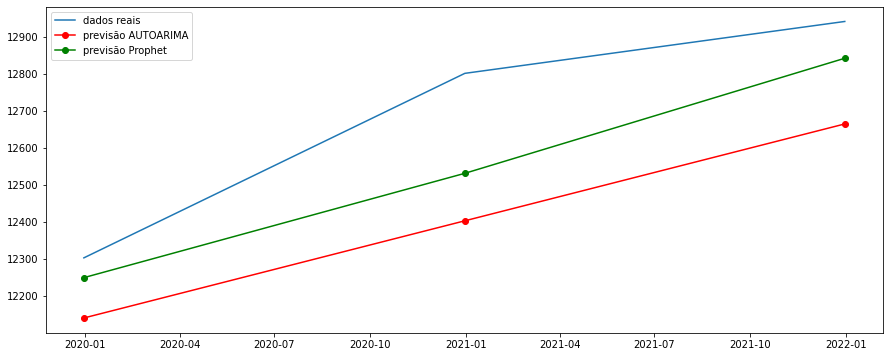

In [37]:
# Plotando a série com dados reais e ajustados pelo modelo
fig, ax = plt.subplots(figsize = (15,6))
plt.plot(st_eletricidade_teste['ds'], st_eletricidade_teste['y'], label='dados reais')
plt.plot(st_eletricidade_prev_AUTOARIMA,color='red', label='previsão AUTOARIMA', marker = 'o')
plt.plot(st_eletricidade_prev_Prophet ,color='green', label='previsão Prophet', marker = 'o')
plt.legend(loc='best')
plt.show()

In [38]:
# Verificando as métricas
print('Comparando os Erros Médios Absolutos')
print('AUTOARIMA: MAE = {}'.format(mae_autoarima))
print('Prophet: MAE = {}'.format(mae_Prophet))

print('\n Comparando as Raízes dos Erros Quadráticos Médios')
print('AUTOARIMA: RMSE = {}'.format(rmse_autoarima))
print('Prophet: RMSE = {}'.format(rmse_Prophet))

Comparando os Erros Médios Absolutos
AUTOARIMA: MAE = 278.9864099819703
Prophet: MAE = 140.85513655271947

 Comparando as Raízes dos Erros Quadráticos Médios
AUTOARIMA: RMSE = 295.1249619525393
Prophet: RMSE = 168.84838130158994


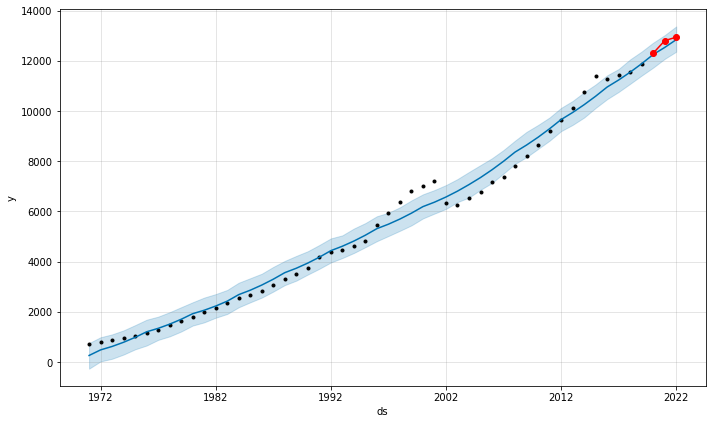

In [39]:
# Carregando biblioteca necessária
import matplotlib.pyplot as plt

# Inserindo os dados de teste no grafico da previsao
grafico_previsao_Prophet = modelo.plot(previsao_Prophet)
plt.plot(st_eletricidade_teste['ds'], st_eletricidade_teste['y'],color='red', label='dados reais de teste', marker = 'o')
grafico_previsao_Prophet.show()